In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

Maybe combine the training and testing data sets for EDA purposes; add an identifying column (1/0) for separating later?

In [3]:
dfTest = pd.read_csv("test.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
dfTest.shape

(1459, 80)

In [15]:
dfBoth = pd.concat([df, dfTest], keys=['train', 'test'], names=['dataSet', 'index'])

In [16]:
dfBoth.shape

(2919, 81)

In [17]:
dfBoth.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataSet index                                                               
train   0       1          60       RL         65.0     8450   Pave   NaN   
        1       2          20       RL         80.0     9600   Pave   NaN   
        2       3          60       RL         68.0    11250   Pave   NaN   
        3       4          70       RL         60.0     9550   Pave   NaN   
        4       5          60       RL         84.0    14260   Pave   NaN   

              LotShape LandContour Utilities  ... PoolArea PoolQC Fence  \
dataSet index                                 ...                         
train   0          Reg         Lvl    AllPub  ...        0    NaN   NaN   
        1          Reg         Lvl    AllPub  ...        0    NaN   NaN   
        2          IR1         Lvl    AllPub  ...        0    NaN   NaN   
        3          IR1         Lvl    AllPub  ...        0    NaN   NaN   
        4          IR1         Lvl    AllPub  ...        0    NaN   NaN   

              MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
dataSet index                                                              
train   0             NaN       0      2   2008        WD         Normal   
        1             NaN       0      5   2007        WD         Normal   
        2             NaN       0      9   2008        WD         Normal   
        3             NaN       0      2   2006        WD        Abnorml   
        4             NaN       0     12   2008        WD         Normal   

               SalePrice  
dataSet index             
train   0       208500.0  
        1       181500.0  
        2       223500.0  
        3       140000.0  
        4       250000.0  

[5 rows x 81 columns]

In [18]:
dfBoth.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataSet index                                                                 
test    1454   2915         160       RM         21.0     1936   Pave   NaN   
        1455   2916         160       RM         21.0     1894   Pave   NaN   
        1456   2917          20       RL        160.0    20000   Pave   NaN   
        1457   2918          85       RL         62.0    10441   Pave   NaN   
        1458   2919          60       RL         74.0     9627   Pave   NaN   

              LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
dataSet index                                 ...                          
test    1454       Reg         Lvl    AllPub  ...        0    NaN    NaN   
        1455       Reg         Lvl    AllPub  ...        0    NaN    NaN   
        1456       Reg         Lvl    AllPub  ...        0    NaN    NaN   
        1457       Reg         Lvl    AllPub  ...        0    NaN  MnPrv   
        1458       Reg         Lvl    AllPub  ...        0    NaN    NaN   

              MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
dataSet index                                                              
test    1454          NaN       0      6   2006        WD         Normal   
        1455          NaN       0      4   2006        WD        Abnorml   
        1456          NaN       0      9   2006        WD        Abnorml   
        1457         Shed     700      7   2006        WD         Normal   
        1458          NaN       0     11   2006        WD         Normal   

               SalePrice  
dataSet index             
test    1454         NaN  
        1455         NaN  
        1456         NaN  
        1457         NaN  
        1458         NaN  

[5 rows x 81 columns]

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Select just number variables
df.select_dtypes(include=[np.number])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [8]:
# Select non-number variables
df.select_dtypes(exclude=[np.number])

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [9]:
# nums = df.select_dtypes(include=[np.number])
# for i in nums.columns:
#     print(i, np.sort(pd.unique(nums[i])))

In [19]:
chars = df.select_dtypes(exclude=[np.number])
for i in chars.columns:
    print(i, pd.unique(chars[i]))

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [20]:
dfBoth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   

In [22]:
missingVals = df.isnull().sum()
missingVals = missingVals[missingVals > 0]
missingVals.sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [24]:
missingVals = dfTest.isnull().sum()
missingVals = missingVals[missingVals > 0]
missingVals.sort_values()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

In [21]:
missingVals = dfBoth.isnull().sum()
missingVals = missingVals[missingVals > 0]
missingVals.sort_values()

Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [44]:
dfBoth.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [45]:
dfBoth.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [15]:
df.loc[df['GarageCars'] == 0.0, 'GarageType'] = 'None'

In [23]:
df.loc[df['GarageCars'] == 0.0, 'GarageCond']

dataSet  index
train    39       None
         48       None
         78       None
         88       None
         89       None
                  ... 
test     1433     None
         1449     None
         1453     None
         1454     None
         1457     None
Name: GarageCond, Length: 158, dtype: object

In [ ]:
df.Bsmt

In [42]:
dfBoth[dfBoth.GarageCond.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataSet index                                                                 
train   39       40          90       RL         65.0     6040   Pave   NaN   
        48       49         190       RM         33.0     4456   Pave   NaN   
        78       79          90       RL         72.0    10778   Pave   NaN   
        88       89          50  C (all)        105.0     8470   Pave   NaN   
        89       90          20       RL         60.0     8070   Pave   NaN   
...             ...         ...      ...          ...      ...    ...   ...   
test    1433   2894          50  C (all)         60.0     8520   Grvl   NaN   
        1449   2910         180       RM         21.0     1470   Pave   NaN   
        1453   2914         160       RM         21.0     1526   Pave   NaN   
        1454   2915         160       RM         21.0     1936   Pave   NaN   
        1457   2918          85       RL         62.0    10441   Pave   NaN   

              LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
dataSet index                                 ...                          
train   39         Reg         Lvl    AllPub  ...        0    NaN    NaN   
        48         Reg         Lvl    AllPub  ...        0    NaN    NaN   
        78         Reg         Lvl    AllPub  ...        0    NaN    NaN   
        88         IR1         Lvl    AllPub  ...        0    NaN  MnPrv   
        89         Reg         Lvl    AllPub  ...        0    NaN    NaN   
...                ...         ...       ...  ...      ...    ...    ...   
test    1433       Reg         Bnk    AllPub  ...        0    NaN    NaN   
        1449       Reg         Lvl    AllPub  ...        0    NaN    NaN   
        1453       Reg         Lvl    AllPub  ...        0    NaN  GdPrv   
        1454       Reg         Lvl    AllPub  ...        0    NaN    NaN   
        1457       Reg         Lvl    AllPub  ...        0    NaN  MnPrv   

              MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
dataSet index                                                              
train   39            NaN       0      6   2008        WD        AdjLand   
        48            NaN       0      6   2009       New        Partial   
        78            NaN       0      4   2010        WD         Normal   
        88            NaN       0     10   2009     ConLD        Abnorml   
        89            NaN       0      8   2007        WD         Normal   
...                   ...     ...    ...    ...       ...            ...   
test    1433          NaN       0      4   2006        WD         Normal   
        1449          NaN       0      4   2006        WD         Normal   
        1453          NaN       0      6   2006        WD         Normal   
        1454          NaN       0      6   2006        WD         Normal   
        1457         Shed     700      7   2006        WD         Normal   

               SalePrice  
dataSet index             
train   39       82000.0  
        48      113000.0  
        78      136500.0  
        88       85000.0  
        89      123600.0  
...                  ...  
test    1433         NaN  
        1449         NaN  
        1453         NaN  
        1454         NaN  
        1457         NaN  

[159 rows x 81 columns]

In [35]:
dfTest[dfTest.GarageArea.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1116         Lvl    AllPub  ...           0        0    NaN  MnPrv   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1116         NaN       0      3    2007        WD         Alloca  

[1 rows x 80 columns]

In [36]:
dfTest[dfTest.GarageCars.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1116         Lvl    AllPub  ...           0        0    NaN  MnPrv   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1116         NaN       0      3    2007        WD         Alloca  

[1 rows x 80 columns]

In [32]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Note: get counts like this of unique values instead of looking at all the unique values.

In [27]:
df[df["Electrical"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1379         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379      5   2008        WD         Normal     167500  

[1 rows x 81 columns]

In [68]:
elec = df[df["Electrical"].notnull()]

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

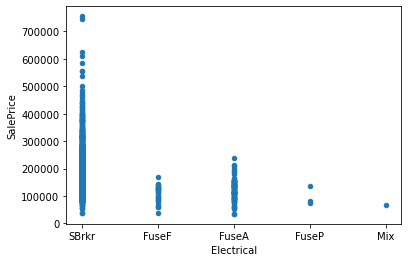

In [69]:
elec.plot.scatter('Electrical', 'SalePrice')

In [70]:
import seaborn as sns

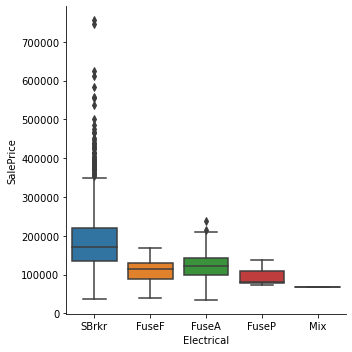

In [72]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=elec)

That looks much better

In [46]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [47]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [49]:
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

(array([865.,  16.,  18.,  13.,  27.,  30.,  37.,  25.,  23.,  23.,  35.,
         29.,  22.,  23.,  17.,  22.,  20.,  15.,  22.,  14.,  11.,  22.,
         11.,   7.,   5.,   4.,  11.,   7.,   9.,   7.,   4.,   3.,   2.,
          3.,   1.,   5.,   3.,   4.,   2.,   2.,   5.,   3.,   1.,   0.,
          1.,   1.,   1.,   3.,   2.,   2.,   0.,   1.,   0.,   1.,   1.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,  128.,
         144.,  160.,  176.,  192.,  208.,  224.,  240.,  256.,  272.,
         288.,  304.,  320.,  336.,  352.,  368.,  384.,  400.,  416.,
         432.,  448.,  464.,  480.,  496.,  512.,  528.,  544.,  560.,
         576.,  592.,  608.,  624.

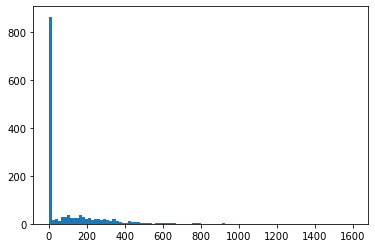

In [51]:
plt.hist(df.MasVnrArea, bins=100)

(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

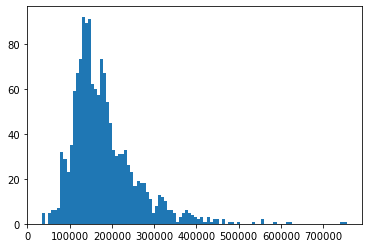

In [13]:
plt.hist(df.SalePrice, bins=100)

(array([ 2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  2.,  1.,  1.,  3.,  2.,  1.,  1.,  4.,  0.,  1.,  2.,  3.,
        11., 10., 12., 10., 12., 11.,  7., 11., 16., 13., 23., 35., 23.,
        33., 32., 33., 60., 40., 63., 59., 56., 37., 46., 44., 40., 42.,
        61., 47., 48., 43., 35., 29., 28., 27., 29., 29., 37., 14., 25.,
        21., 18., 24., 17.,  6., 10., 19., 15.,  7., 10.,  3.,  4.,  9.,
        10.,  3.,  3.,  4.,  4.,  1.,  3.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([4.54282543, 4.55617664, 4.56952786, 4.58287907, 4.59623029,
        4.6095815 , 4.62293272, 4.63628393, 4.64963515, 4.66298636,
        4.67633758, 4.68968879, 4.70304001, 4.71639123, 4.72974244,
        4.74309366, 4.75644487, 4.76979609, 4.7831473 , 4.79649852,
        4.80984973, 4.82320095, 4.83655216, 4.84990338, 4.86325459,
        4.87660581, 4.88995702, 4.90330824, 4.91665945, 4.93001067,
        4.94336188, 4.9567

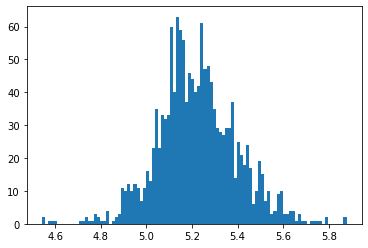

In [21]:
log10 = np.log10(df.SalePrice)
plt.hist(log10, bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1ca5407c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1ca540e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1ca540340>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1ca552580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1ca552910>],
 'means': []}

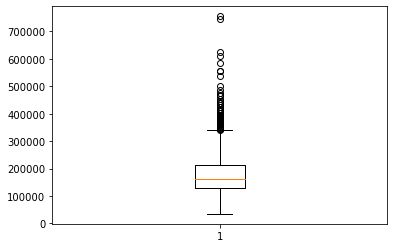

In [14]:
plt.boxplot(df.SalePrice)

In [15]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


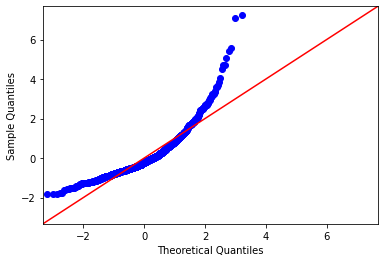

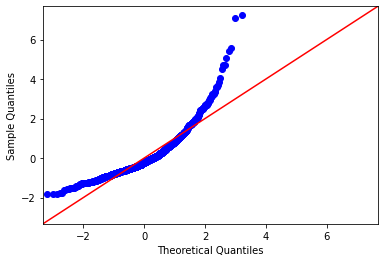

In [20]:
sm.qqplot(df.SalePrice, fit=True, line="45")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


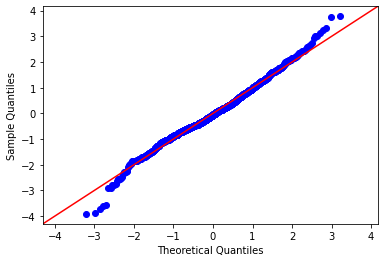

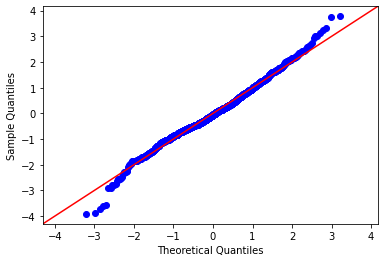

In [22]:
sm.qqplot(log10, fit=True, line="45")